  Crypto      Date    Open    High     Low   Close
0    BTC  12/31/19  7254.0  7309.0  7132.0  7171.0
1    BTC  12/30/19  7402.0  7430.0  7217.0  7254.0
2    BTC  12/29/19  7334.0  7529.0  7295.0  7402.0
3    BTC  12/28/19  7235.0  7359.0  7235.0  7334.0
4    BTC  12/27/19  7208.0  7267.0  7087.0  7235.0
(1480, 3) (494, 3) (1480,) (494,)
The overall score for Logistic Regression classifier is: 54.51


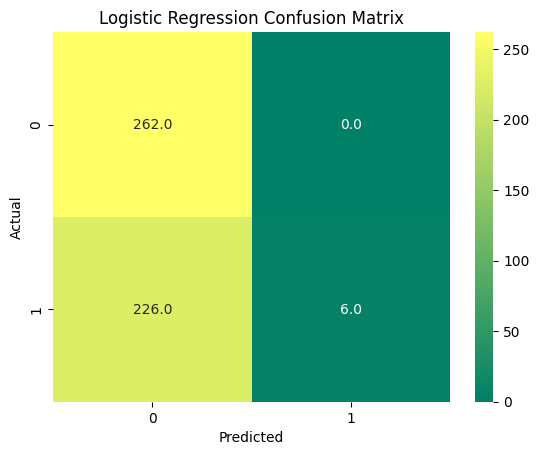


--------------- Logistic Regression Classification Report ---------------

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       262
           1       1.00      0.03      0.05       232

    accuracy                           0.54       494
   macro avg       0.77      0.51      0.37       494
weighted avg       0.75      0.54      0.39       494

Micro Precision: 0.5425
Micro Recall: 0.5425
Micro F1-score: 0.5425

Macro Precision: 0.7684
Macro Recall: 0.5129
Macro F1-score: 0.3745

Weighted Precision: 0.7544
Weighted Recall: 0.5425
Weighted F1-score: 0.3942


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Load the dataset
hazel_df = pd.read_csv("btc.csv")  # Change to the correct file path

# Display the first few rows of the DataFrame
print(hazel_df.head())

# Feature selection
# Drop 'crypto' and 'date' as they are not numeric features
all_features = hazel_df.drop(columns=['Crypto', 'Date', 'Close'])  # Assuming we want to predict 'close'
target_feature = (hazel_df['Close'].shift(-1) > hazel_df['Close']).astype(int)  # Binary target: 1 if price goes up, else 0
all_features.head()

# Dataset preprocessing
# Ensure all features are numeric
x = all_features.values.astype(float)  # Returns a numpy array of type float
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scaled_features = pd.DataFrame(x_scaled, columns=all_features.columns)  # Retain column names
scaled_features.head()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target_feature, test_size=0.25, random_state=40)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# K-fold cross-validation
kfold = KFold(n_splits=10, random_state=None)  # k=10, split the data into 10 equal parts
result_logistic = cross_val_score(model, scaled_features, target_feature, cv=kfold, scoring='accuracy')
print('The overall score for Logistic Regression classifier is:', round(result_logistic.mean() * 100, 2))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt=".1f", cmap='summer')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification metrics
print('\n--------------- Logistic Regression Classification Report ---------------\n')
print(classification_report(y_test, y_pred))

# Additional metrics
print('Micro Precision: {:.4f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.4f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.4f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.4f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.4f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.4f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.4f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.4f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.4f}'.format(f1_score(y_test, y_pred, average='weighted')))

The overall score for K Nearest Neighbors Classifier is: 59.58
Micro Precision: 0.6680
Micro Recall: 0.6680
Micro F1-score: 0.6680

Macro Precision: 0.6676
Macro Recall: 0.6636
Macro F1-score: 0.6637

Weighted Precision: 0.6677
Weighted Recall: 0.6680
Weighted F1-score: 0.6660

--------------- K-Nearest Neighbour Classification Report ---------------

              precision    recall  f1-score   support

           0       0.67      0.74      0.70       262
           1       0.67      0.59      0.63       232

    accuracy                           0.67       494
   macro avg       0.67      0.66      0.66       494
weighted avg       0.67      0.67      0.67       494



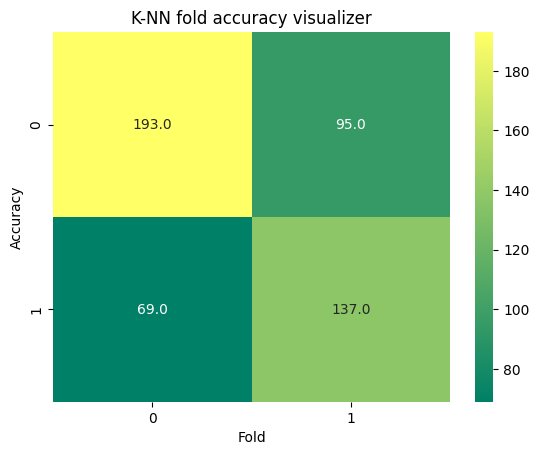

In [ ]:
#KNN
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 25)
model.fit(X_train,y_train)
dt_knn=model.predict(X_test)
kfold = KFold(n_splits=10, random_state=None) # k=10, split the data into 10 equal parts=
result_knn=cross_val_score(model,scaled_features,target_feature,cv=kfold,scoring='accuracy')
print('The overall score for K Nearest Neighbors Classifier is:',round(result_knn.mean()*100,2))
y_pred = cross_val_predict(model,scaled_features,target_feature,cv=10)
sns.heatmap(confusion_matrix(dt_knn,y_test),annot=True,fmt=".1f",cmap='summer')
plt.title('KNN Confusion_matrix')


#KNN fold accuracy visualizer
_result_knn=[r*100 for r in result_knn]
plt.plot(_result_knn)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('K-NN fold accuracy visualizer')


from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score
print('Micro Precision: {:.4f}'.format(precision_score(y_test, dt_knn, average='micro')))
print('Micro Recall: {:.4f}'.format(recall_score(y_test, dt_knn, average='micro')))
print('Micro F1-score: {:.4f}\n'.format(f1_score(y_test, dt_knn, average='micro')))

print('Macro Precision: {:.4f}'.format(precision_score(y_test, dt_knn, average='macro')))
print('Macro Recall: {:.4f}'.format(recall_score(y_test, dt_knn, average='macro')))
print('Macro F1-score: {:.4f}\n'.format(f1_score(y_test, dt_knn, average='macro')))

print('Weighted Precision: {:.4f}'.format(precision_score(y_test, dt_knn, average='weighted')))
print('Weighted Recall: {:.4f}'.format(recall_score(y_test, dt_knn, average='weighted')))
print('Weighted F1-score: {:.4f}'.format(f1_score(y_test, dt_knn, average='weighted')))

print('\n--------------- K-Nearest Neighbour Classification Report ---------------\n')
print(classification_report(y_test, dt_knn))
#print('---------------------- K-NN ----------------------') # unnecessary fancy styling




The overall score for Gaussian Naive Bayes classifier is: 49.84
Micro Precision: 0.5263
Micro Recall: 0.5263
Micro F1-score: 0.5263

Macro Precision: 0.5081
Macro Recall: 0.5036
Macro F1-score: 0.4335

Weighted Precision: 0.5096
Weighted Recall: 0.5263
Weighted F1-score: 0.4474

---------------Naive Bayes Classification Report ---------------

              precision    recall  f1-score   support

           0       0.53      0.88      0.66       262
           1       0.48      0.13      0.20       232

    accuracy                           0.53       494
   macro avg       0.51      0.50      0.43       494
weighted avg       0.51      0.53      0.45       494



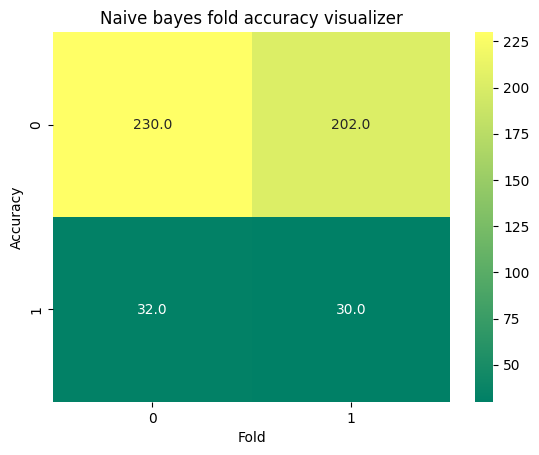

In [ ]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(X_train,y_train)
gnb_pred=model.predict(X_test)
kfold = KFold(n_splits=10, random_state=None) # k=10, split the data into 10 equal parts
result_gnb=cross_val_score(model,scaled_features,target_feature,cv=10,scoring='accuracy')
print('The overall score for Gaussian Naive Bayes classifier is:',round(result_gnb.mean()*100,2))
y_pred = cross_val_predict(model,scaled_features,target_feature,cv=10)
sns.heatmap(confusion_matrix(gnb_pred,y_test),annot=True,fmt=".1f",cmap='summer')
plt.title('Naive Bayes Confusion_matrix')


#Naive bayes fold accuracy visualizer
_result_gnb=[r*100 for r in result_gnb]
plt.plot(_result_gnb)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.title('Naive bayes fold accuracy visualizer')


from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score
print('Micro Precision: {:.4f}'.format(precision_score(y_test, gnb_pred, average='micro')))
print('Micro Recall: {:.4f}'.format(recall_score(y_test, gnb_pred, average='micro')))
print('Micro F1-score: {:.4f}\n'.format(f1_score(y_test, gnb_pred, average='micro')))

print('Macro Precision: {:.4f}'.format(precision_score(y_test, gnb_pred, average='macro')))
print('Macro Recall: {:.4f}'.format(recall_score(y_test, gnb_pred, average='macro')))
print('Macro F1-score: {:.4f}\n'.format(f1_score(y_test, gnb_pred, average='macro')))


print('Weighted Precision: {:.4f}'.format(precision_score(y_test, gnb_pred, average='weighted')))
print('Weighted Recall: {:.4f}'.format(recall_score(y_test, gnb_pred, average='weighted')))
print('Weighted F1-score: {:.4f}'.format(f1_score(y_test, gnb_pred, average='weighted')))

print('\n---------------Naive Bayes Classification Report ---------------\n')
print(classification_report(y_test, gnb_pred))
#print('---------------------- Naive Bayes ----------------------') # unnecessary fancy styling


